In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [3]:
target_corr=app_train.corr()['TARGET']

## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [4]:
target_corr.sort_values().head(15)


EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
DAYS_BIRTH                             -0.078239
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
NAME_INCOME_TYPE_Pensioner             -0.046209
ORGANIZATION_TYPE_XNA                  -0.045987
DAYS_EMPLOYED_ANOM                     -0.045987
FLOORSMAX_AVG                          -0.044003
FLOORSMAX_MEDI                         -0.043768
FLOORSMAX_MODE                         -0.043226
EMERGENCYSTATE_MODE_No                 -0.042201
HOUSETYPE_MODE_block of flats          -0.040594
AMT_GOODS_PRICE                        -0.039645
Name: TARGET, dtype: float64

In [5]:
target_corr.sort_values().tail(15)

DAYS_REGISTRATION                                    0.041975
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
TARGET                                               1.000000
Name: TARGET, dtype: float64

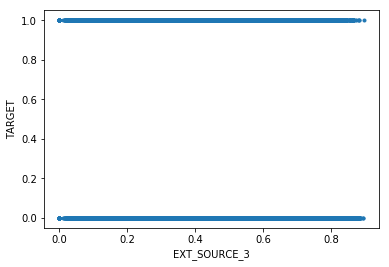

-0.17891869762805598

In [6]:
plt.plot( app_train['EXT_SOURCE_3'],app_train['TARGET'],'.')
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('TARGET')
plt.show()
corr = np.corrcoef(app_train['EXT_SOURCE_3'], app_train['TARGET'])
target_corr['EXT_SOURCE_3']

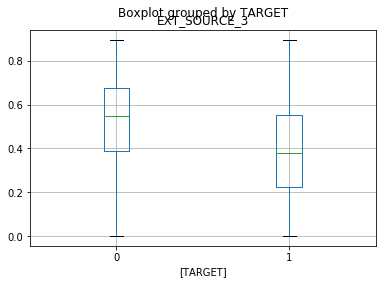

In [7]:
app_train.boxplot(['EXT_SOURCE_3'],by=['TARGET'])
plt.show()

In [8]:
income_total_corr=app_train.corr()['AMT_INCOME_TOTAL']

In [9]:
income_total_corr.sort_values().head(15)

OWN_CAR_AGE                                         -0.117273
REGION_RATING_CLIENT_W_CITY                         -0.091735
NAME_EDUCATION_TYPE_Secondary / secondary special   -0.090043
REGION_RATING_CLIENT                                -0.085465
CODE_GENDER_F                                       -0.074731
DAYS_EMPLOYED_ANOM                                  -0.064038
ORGANIZATION_TYPE_XNA                               -0.064038
NAME_INCOME_TYPE_Pensioner                          -0.064018
FLAG_DOCUMENT_6                                     -0.045878
EXT_SOURCE_3                                        -0.030229
DAYS_BIRTH                                          -0.027261
NAME_FAMILY_STATUS_Widow                            -0.025561
NAME_INCOME_TYPE_Working                            -0.024522
OCCUPATION_TYPE_Sales staff                         -0.023750
ORGANIZATION_TYPE_Kindergarten                      -0.019907
Name: AMT_INCOME_TOTAL, dtype: float64

In [10]:
income_total_corr.sort_values().tail(15)

FLAG_OWN_CAR                            0.083383
COMMONAREA_MEDI                         0.087918
COMMONAREA_AVG                          0.089616
LIVINGAPARTMENTS_MODE                   0.092991
NAME_EDUCATION_TYPE_Higher education    0.095342
LIVINGAPARTMENTS_MEDI                   0.104914
OCCUPATION_TYPE_Managers                0.105501
LIVINGAPARTMENTS_AVG                    0.106920
FLOORSMIN_MODE                          0.131800
FLOORSMIN_MEDI                          0.138489
FLOORSMIN_AVG                           0.139860
AMT_CREDIT                              0.156870
AMT_GOODS_PRICE                         0.159610
AMT_ANNUITY                             0.191657
AMT_INCOME_TOTAL                        1.000000
Name: AMT_INCOME_TOTAL, dtype: float64

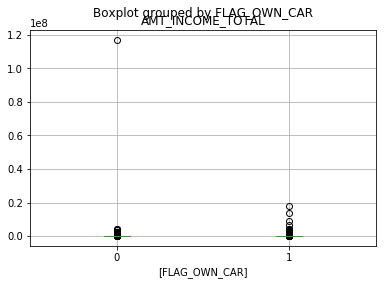

In [11]:
app_train.boxplot(['AMT_INCOME_TOTAL'],by=['FLAG_OWN_CAR'])
plt.show()

In [14]:
app_train['AMT_INCOME_TOTAL_LOG']= np.log(app_train['AMT_INCOME_TOTAL'])

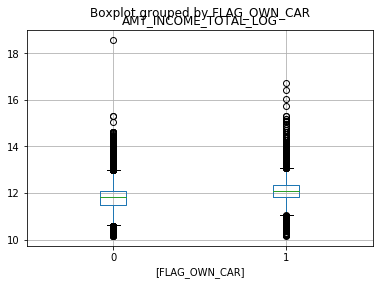

In [17]:
app_train.boxplot(['AMT_INCOME_TOTAL_LOG'],by=['FLAG_OWN_CAR'])
plt.show()

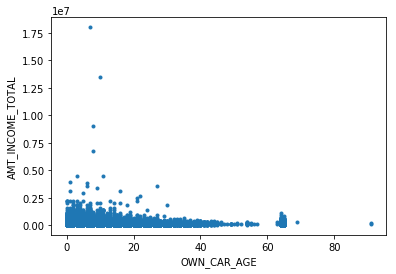

In [18]:
plt.plot(abs(app_train['OWN_CAR_AGE']), app_train['AMT_INCOME_TOTAL'],'.')
plt.xlabel('OWN_CAR_AGE')
plt.ylabel('AMT_INCOME_TOTAL')
plt.show()

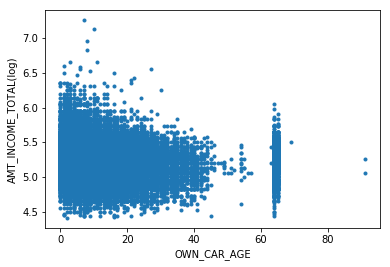

In [19]:
plt.plot(abs(app_train['OWN_CAR_AGE']), np.log10(app_train['AMT_INCOME_TOTAL']),'.')
plt.xlabel('OWN_CAR_AGE')
plt.ylabel('AMT_INCOME_TOTAL(log)')
plt.show()